<a href="https://colab.research.google.com/github/ClaFlorez/Machine_Learning_Simplifie/blob/main/8_Clustering_hierarchique_exhaustif.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Clustering Hi√©rarchique: Organisation automatique de catalogue produits
Catalogue de produits g√©n√©r√©:
  Nombre total de produits: 302
  Cat√©gories cach√©es: 5
  Prix moyen: 211.54‚Ç¨
  Note moyenne: 4.07/5

Features utilis√©es pour le clustering:
  ‚Ä¢ prix: 211.54 ¬± 212.44
  ‚Ä¢ note_moyenne: 4.07 ¬± 0.53
  ‚Ä¢ poids_kg: 1.55 ¬± 1.31
  ‚Ä¢ nb_avis: 59.86 ¬± 6.79
  ‚Ä¢ anciennete_mois: 11.83 ¬± 11.62
  ‚Ä¢ taux_retour_pct: 9.13 ¬± 5.88

Calcul des distances entre tous les produits...
M√©thodes de distance disponibles:
  ‚Ä¢ euclidienne: Distance classique dans l'espace
  ‚Ä¢ manhattan: Somme des diff√©rences absolues
  ‚Ä¢ cosine: Angle entre les vecteurs
Matrice de distances calcul√©e: 45,451 paires de distances

Comparaison des m√©thodes de linkage:

M√©thode ward: Minimise la variance intra-cluster (recommand√©)
  Silhouette score: 0.152
  Accord avec vraies cat√©gories: 0.313

M√©thode complete: Distance maximale entre clusters
  Silhouette score: 0.070
  Accord avec vraies c

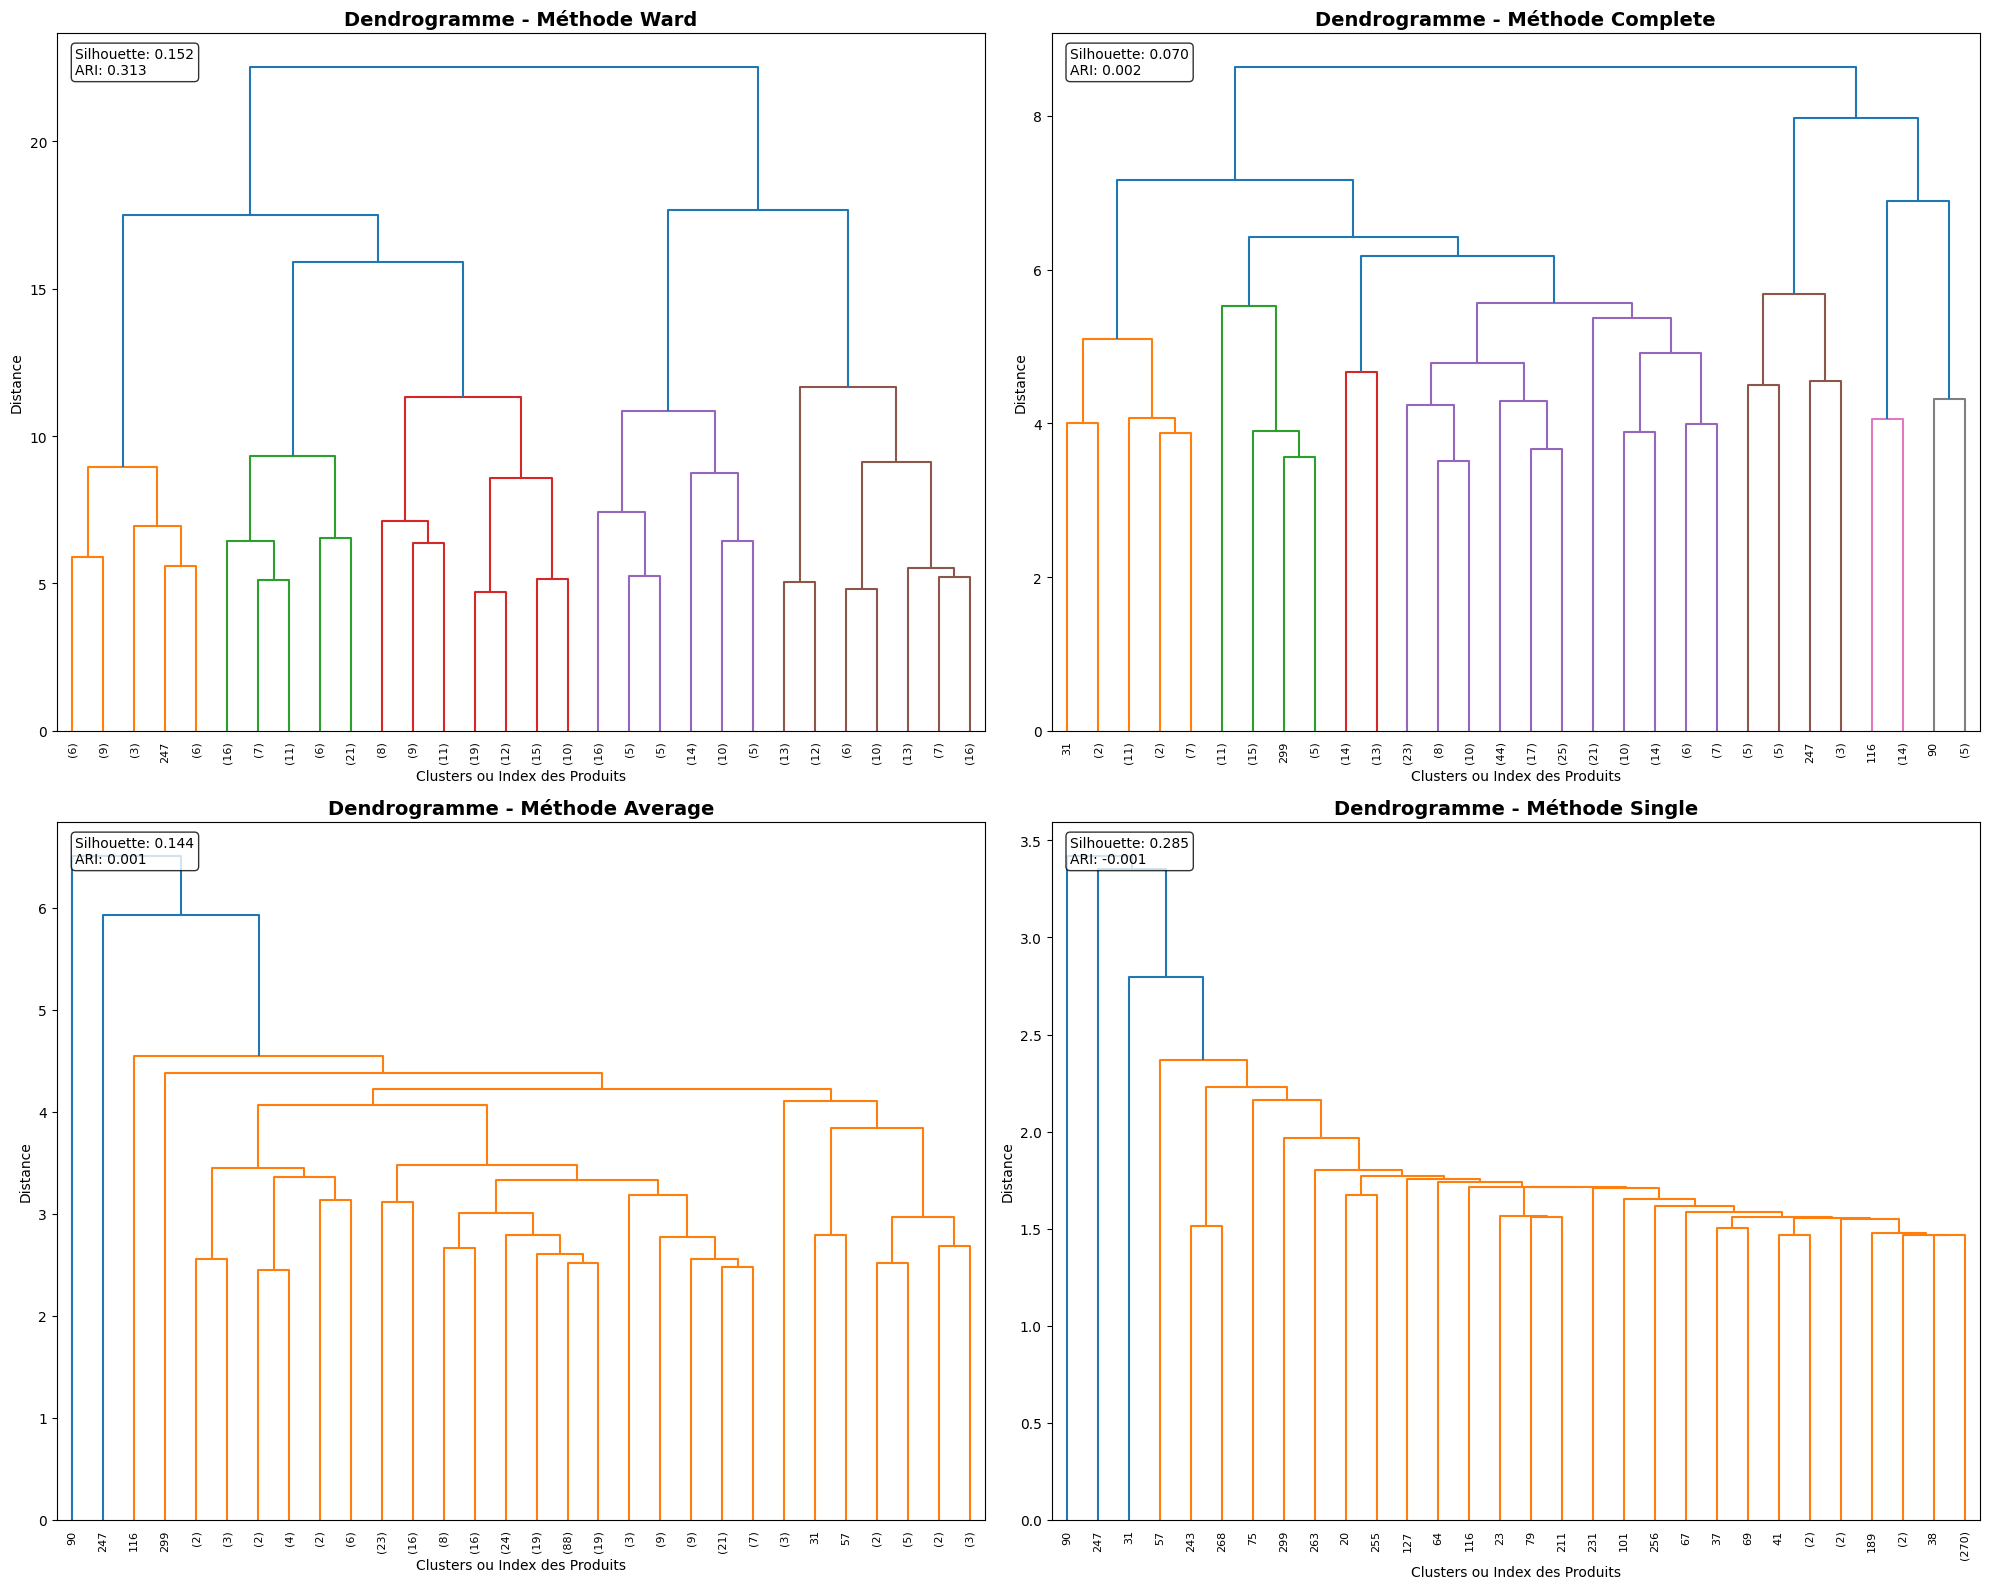


Analyse d√©taill√©e de la m√©thode Ward (recommand√©e):
K=2: Silhouette=0.151, Variance tailles=5307.6
K=3: Silhouette=0.143, Variance tailles=3763.2
K=4: Silhouette=0.164, Variance tailles=2472.6
K=5: Silhouette=0.152, Variance tailles=859.2
K=6: Silhouette=0.143, Variance tailles=675.3
K=7: Silhouette=0.135, Variance tailles=402.4
K=8: Silhouette=0.142, Variance tailles=330.9
K=9: Silhouette=0.129, Variance tailles=215.6
K=10: Silhouette=0.133, Variance tailles=166.6

Nombre optimal de clusters: 4

Analyse des clusters hi√©rarchiques (K=4):

Cluster 1 (25 produits):
  prix: 133.02
  note_moyenne: 3.84
  poids_kg: 1.41
  nb_avis: 59.52
  anciennete_mois: 38.46
  taux_retour_pct: 9.76
  Composition:
    - Maison: 7 produits (28.0%)
    - Livres: 6 produits (24.0%)
    - V√™tements: 6 produits (24.0%)
    - Sports: 5 produits (20.0%)
    - √âlectronique: 1 produits (4.0%)
  ‚Üí Cluster mixte, domin√© par Maison (28.0%)

Cluster 2 (145 produits):
  prix: 83.86
  note_moyenne: 4.08
  poi

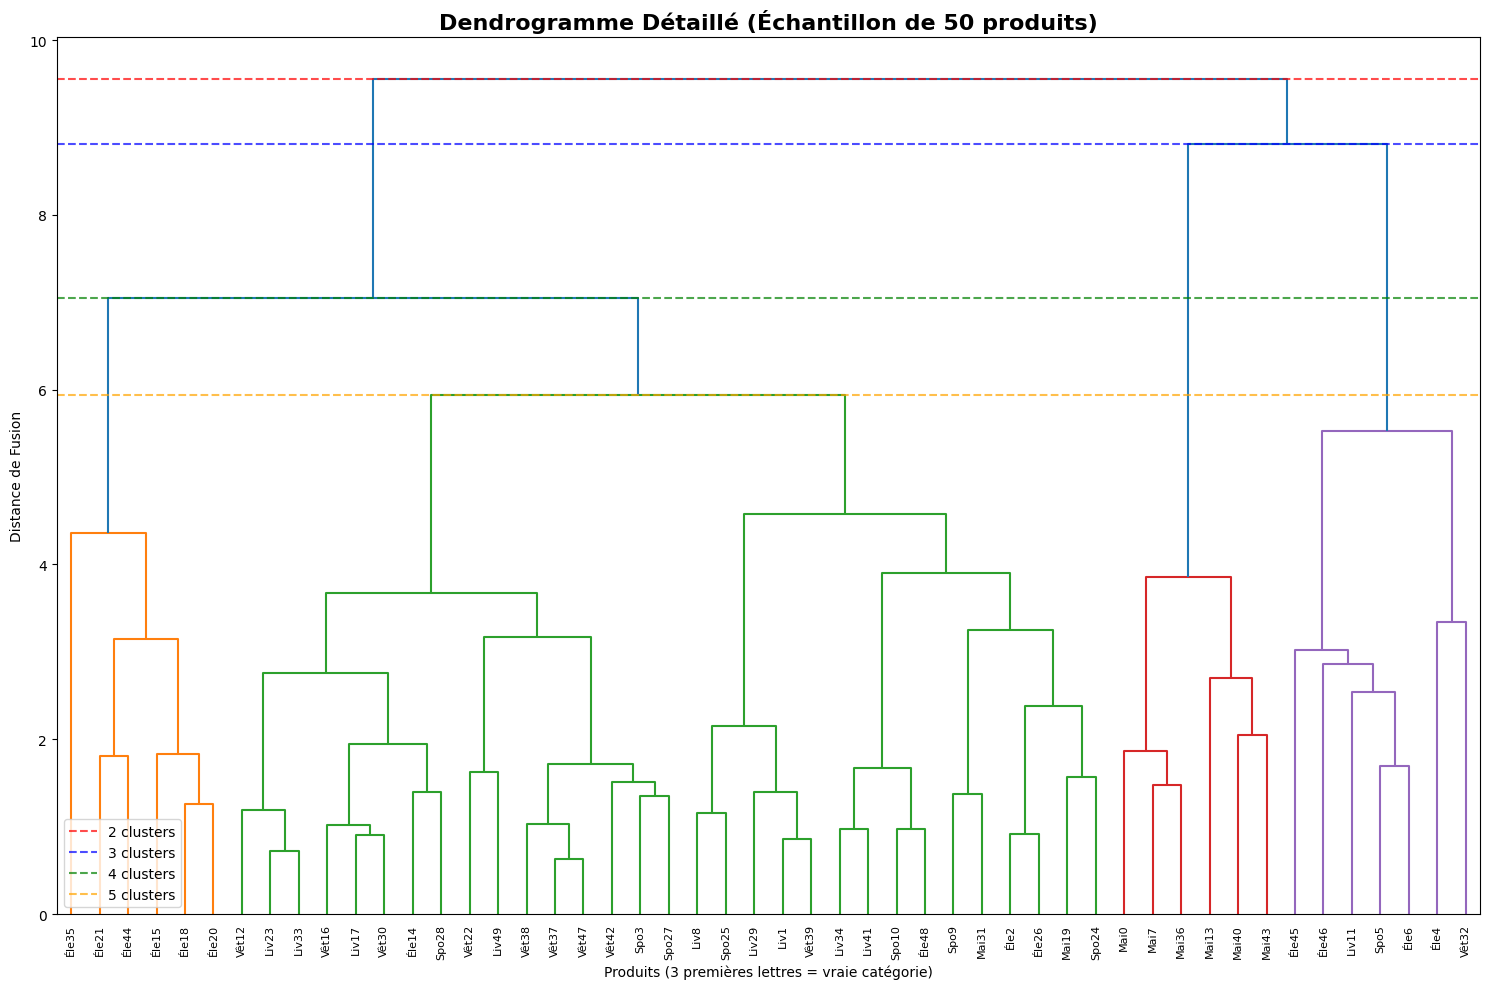


Comparaison Clustering Hi√©rarchique vs K-Means:
Accord entre les deux m√©thodes: 0.545
‚úÖ Coh√©rence mod√©r√©e

Avantages du Clustering Hi√©rarchique:
‚úÖ Pas besoin de choisir K √† l'avance
‚úÖ Montre la structure √† tous les niveaux
‚úÖ R√©sultats d√©terministes (pas d'al√©atoire)
‚úÖ Visualisation intuitive avec dendrogramme
‚úÖ Peut d√©tecter des clusters de formes irr√©guli√®res

Inconv√©nients:
‚ùå Tr√®s lent sur de gros datasets (complexit√© O(n¬≥))
‚ùå Sensible au bruit et aux outliers
‚ùå Difficile de corriger une mauvaise fusion
‚ùå Choix de la m√©thode de linkage peut √™tre d√©licat

Guide pratique d'utilisation:
UTILISEZ le clustering hi√©rarchique quand:
  ‚Ä¢ Vous ne savez pas combien de clusters chercher
  ‚Ä¢ Vous voulez explorer la structure √† diff√©rents niveaux
  ‚Ä¢ Dataset relativement petit (<5000 points)
  ‚Ä¢ Vous voulez une visualisation de la hi√©rarchie
  ‚Ä¢ Les clusters peuvent avoir des formes non-sph√©riques

√âVITEZ le clustering hi√©rarchique quand:

In [1]:
#Clustering hi√©rarchique exhaustif
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Cr√©er un dataset de produits pour classification hi√©rarchique
print("Clustering Hi√©rarchique: Organisation automatique de catalogue produits")
print("=" * 80)

np.random.seed(42)

# Simuler des produits avec diff√©rentes caract√©ristiques
produits_data = []
categories_cachees = [
    {'nom': '√âlectronique', 'prix_moy': 500, 'note_moy': 4.2, 'poids_moy': 1.5},
    {'nom': 'V√™tements', 'prix_moy': 80, 'note_moy': 3.8, 'poids_moy': 0.3},
    {'nom': 'Livres', 'prix_moy': 25, 'note_moy': 4.5, 'poids_moy': 0.4},
    {'nom': 'Sports', 'prix_moy': 150, 'note_moy': 4.0, 'poids_moy': 2.0},
    {'nom': 'Maison', 'prix_moy': 200, 'note_moy': 3.9, 'poids_moy': 3.5}
]

for i, categorie in enumerate(categories_cachees):
    n_produits = np.random.randint(40, 80)  # 40-80 produits par cat√©gorie

    for j in range(n_produits):
        # G√©n√©rer les caract√©ristiques avec variabilit√© r√©aliste
        prix = max(5, np.random.normal(categorie['prix_moy'], categorie['prix_moy'] * 0.4))
        note = np.clip(np.random.normal(categorie['note_moy'], 0.5), 1, 5)
        poids = max(0.1, np.random.normal(categorie['poids_moy'], categorie['poids_moy'] * 0.3))

        # Ajouter des features suppl√©mentaires
        nb_avis = np.random.poisson(50) + 10
        anciennete_mois = np.random.exponential(12)
        taux_retour = np.random.beta(2, 20) * 100  # Entre 0 et 100%

        produits_data.append({
            'produit_id': f'P{i*100 + j:04d}',
            'prix': prix,
            'note_moyenne': note,
            'poids_kg': poids,
            'nb_avis': nb_avis,
            'anciennete_mois': anciennete_mois,
            'taux_retour_pct': taux_retour,
            'vraie_categorie': categorie['nom']  # Pour validation (normalement inconnue)
        })

df_produits = pd.DataFrame(produits_data)

print(f"Catalogue de produits g√©n√©r√©:")
print(f"  Nombre total de produits: {len(df_produits):,}")
print(f"  Cat√©gories cach√©es: {len(categories_cachees)}")
print(f"  Prix moyen: {df_produits['prix'].mean():.2f}‚Ç¨")
print(f"  Note moyenne: {df_produits['note_moyenne'].mean():.2f}/5")

# Pr√©parer les donn√©es pour le clustering
features_clustering = ['prix', 'note_moyenne', 'poids_kg', 'nb_avis', 'anciennete_mois', 'taux_retour_pct']
X = df_produits[features_clustering]

print(f"\nFeatures utilis√©es pour le clustering:")
for feature in features_clustering:
    print(f"  ‚Ä¢ {feature}: {X[feature].mean():.2f} ¬± {X[feature].std():.2f}")

# Standardiser (crucial pour clustering hi√©rarchique)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"\nCalcul des distances entre tous les produits...")
print("M√©thodes de distance disponibles:")
print("  ‚Ä¢ euclidienne: Distance classique dans l'espace")
print("  ‚Ä¢ manhattan: Somme des diff√©rences absolues")
print("  ‚Ä¢ cosine: Angle entre les vecteurs")

# Calculer la matrice de distances
distances = pdist(X_scaled, metric='euclidean')
print(f"Matrice de distances calcul√©e: {len(distances):,} paires de distances")

# Diff√©rentes m√©thodes de linkage
linkage_methods = {
    'ward': 'Minimise la variance intra-cluster (recommand√©)',
    'complete': 'Distance maximale entre clusters',
    'average': 'Distance moyenne entre clusters',
    'single': 'Distance minimale entre clusters'
}

print(f"\nComparaison des m√©thodes de linkage:")
print("=" * 60)

fig, axes = plt.subplots(2, 2, figsize=(20, 16))
linkage_results = {}

for i, (method, description) in enumerate(linkage_methods.items()):
    print(f"\nM√©thode {method}: {description}")

    # Calculer la matrice de linkage
    Z = linkage(X_scaled, method=method)
    linkage_results[method] = Z

    # Cr√©er le dendrogramme
    ax = axes[i//2, i%2]

    # Dendrogramme complet (tronqu√© pour lisibilit√©)
    dend = dendrogram(Z, ax=ax, truncate_mode='lastp', p=30,
                     leaf_rotation=90, leaf_font_size=8,
                     show_leaf_counts=True)

    ax.set_title(f'Dendrogramme - M√©thode {method.title()}', fontweight='bold', fontsize=14)
    ax.set_xlabel('Clusters ou Index des Produits')
    ax.set_ylabel('Distance')

    # Analyser la qualit√© de cette m√©thode
    # Couper l'arbre en 5 clusters (nombre de vraies cat√©gories)
    clusters_hierarchical = fcluster(Z, 5, criterion='maxclust')

    # Calculer l'homog√©n√©it√© interne
    from sklearn.metrics import silhouette_score, adjusted_rand_score

    if len(np.unique(clusters_hierarchical)) > 1:
        sil_score = silhouette_score(X_scaled, clusters_hierarchical)

        # Comparer avec les vraies cat√©gories
        vraies_categories_encoded = pd.Categorical(df_produits['vraie_categorie']).codes
        ari_score = adjusted_rand_score(vraies_categories_encoded, clusters_hierarchical)

        print(f"  Silhouette score: {sil_score:.3f}")
        print(f"  Accord avec vraies cat√©gories: {ari_score:.3f}")

        # Ajouter l'information sur le graphique
        ax.text(0.02, 0.98, f'Silhouette: {sil_score:.3f}\nARI: {ari_score:.3f}',
               transform=ax.transAxes, fontsize=10,
               bbox=dict(boxstyle='round', facecolor='white', alpha=0.8),
               verticalalignment='top')

plt.tight_layout()
plt.show()

# Analyser en d√©tail la meilleure m√©thode (ward)
print(f"\nAnalyse d√©taill√©e de la m√©thode Ward (recommand√©e):")
print("=" * 60)

Z_ward = linkage_results['ward']

# Tester diff√©rents nombres de clusters
cluster_range = range(2, 11)
ward_analysis = {}

for n_clusters in cluster_range:
    clusters = fcluster(Z_ward, n_clusters, criterion='maxclust')

    # M√©triques de qualit√©
    sil_score = silhouette_score(X_scaled, clusters)

    # Homog√©n√©it√© des tailles de clusters
    cluster_sizes = np.bincount(clusters)
    size_variance = np.var(cluster_sizes)

    ward_analysis[n_clusters] = {
        'silhouette': sil_score,
        'size_variance': size_variance,
        'clusters': clusters
    }

    print(f"K={n_clusters}: Silhouette={sil_score:.3f}, Variance tailles={size_variance:.1f}")

# Trouver le nombre optimal de clusters
best_k = max(ward_analysis.keys(), key=lambda k: ward_analysis[k]['silhouette'])
print(f"\nNombre optimal de clusters: {best_k}")

# Analyser les clusters optimaux
clusters_optimal = ward_analysis[best_k]['clusters']
df_produits['cluster_hierarchical'] = clusters_optimal

print(f"\nAnalyse des clusters hi√©rarchiques (K={best_k}):")
print("=" * 60)

for cluster_id in range(1, best_k + 1):
    cluster_data = df_produits[df_produits['cluster_hierarchical'] == cluster_id]

    if len(cluster_data) > 0:
        print(f"\nCluster {cluster_id} ({len(cluster_data)} produits):")

        # Statistiques moyennes
        for feature in features_clustering:
            avg_val = cluster_data[feature].mean()
            print(f"  {feature}: {avg_val:.2f}")

        # Analyser la composition en vraies cat√©gories
        composition = cluster_data['vraie_categorie'].value_counts()
        print(f"  Composition:")
        for categorie, count in composition.items():
            pct = count / len(cluster_data) * 100
            print(f"    - {categorie}: {count} produits ({pct:.1f}%)")

        # Identifier le profil dominant
        categorie_dominante = composition.index[0]
        purete = composition.iloc[0] / len(cluster_data)

        if purete > 0.8:
            print(f"  ‚Üí Cluster tr√®s homog√®ne: {categorie_dominante} ({purete:.1%})")
        elif purete > 0.6:
            print(f"  ‚Üí Cluster assez homog√®ne: {categorie_dominante} ({purete:.1%})")
        else:
            print(f"  ‚Üí Cluster mixte, domin√© par {categorie_dominante} ({purete:.1%})")

# Visualiser l'arbre de d√©cision pour couper √† diff√©rents niveaux
print(f"\nD√©monstration de la flexibilit√© hi√©rarchique:")
print("=" * 50)

# Montrer comment le m√™me arbre donne diff√©rents groupements
for k_demo in [2, 3, 5, 7]:
    clusters_demo = fcluster(Z_ward, k_demo, criterion='maxclust')
    tailles_clusters = np.bincount(clusters_demo)

    print(f"\nAvec {k_demo} clusters:")
    for i, taille in enumerate(tailles_clusters):
        if i > 0:  # fcluster commence √† 1
            print(f"  Cluster {i}: {taille} produits")

# Cr√©er un dendrogramme d√©taill√© pour un sous-ensemble
print(f"\nCr√©ation d'un dendrogramme d√©taill√©...")

# Prendre un √©chantillon pour un dendrogramme lisible
sample_size = 50
sample_indices = np.random.choice(len(df_produits), sample_size, replace=False)
X_sample = X_scaled[sample_indices]
df_sample = df_produits.iloc[sample_indices].copy()

# Calculer le linkage pour l'√©chantillon
Z_sample = linkage(X_sample, method='ward')

# Dendrogramme d√©taill√©
plt.figure(figsize=(15, 10))
dend_detailed = dendrogram(Z_sample,
                          labels=[f"{row['vraie_categorie'][:3]}{i}" for i, (_, row) in enumerate(df_sample.iterrows())],
                          leaf_rotation=90, leaf_font_size=8)

plt.title('Dendrogramme D√©taill√© (√âchantillon de 50 produits)', fontweight='bold', fontsize=16)
plt.xlabel('Produits (3 premi√®res lettres = vraie cat√©gorie)')
plt.ylabel('Distance de Fusion')

# Ajouter des lignes de coupe pour diff√©rents nombres de clusters
colors = ['red', 'blue', 'green', 'orange']
for i, k_cut in enumerate([2, 3, 4, 5]):
    # Calculer la hauteur de coupe pour k clusters
    if k_cut <= len(Z_sample):
        hauteur_coupe = Z_sample[-k_cut + 1, 2]
        plt.axhline(y=hauteur_coupe, color=colors[i], linestyle='--', alpha=0.7,
                   label=f'{k_cut} clusters')

plt.legend()
plt.tight_layout()
plt.show()

# Comparer clustering hi√©rarchique vs K-Means
print(f"\nComparaison Clustering Hi√©rarchique vs K-Means:")
print("=" * 60)

from sklearn.cluster import KMeans

# K-Means sur les m√™mes donn√©es
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
clusters_kmeans = kmeans.fit_predict(X_scaled)

# Comparer les r√©sultats
accord_kmeans_hierarchical = adjusted_rand_score(clusters_optimal, clusters_kmeans)

print(f"Accord entre les deux m√©thodes: {accord_kmeans_hierarchical:.3f}")

if accord_kmeans_hierarchical > 0.7:
    print("‚úÖ Forte coh√©rence entre les m√©thodes")
elif accord_kmeans_hierarchical > 0.5:
    print("‚úÖ Coh√©rence mod√©r√©e")
else:
    print("‚ö†Ô∏è R√©sultats diff√©rents - analyser les causes")

# Analyser les avantages et inconv√©nients
print(f"\nAvantages du Clustering Hi√©rarchique:")
print("=" * 50)
print("‚úÖ Pas besoin de choisir K √† l'avance")
print("‚úÖ Montre la structure √† tous les niveaux")
print("‚úÖ R√©sultats d√©terministes (pas d'al√©atoire)")
print("‚úÖ Visualisation intuitive avec dendrogramme")
print("‚úÖ Peut d√©tecter des clusters de formes irr√©guli√®res")

print(f"\nInconv√©nients:")
print("‚ùå Tr√®s lent sur de gros datasets (complexit√© O(n¬≥))")
print("‚ùå Sensible au bruit et aux outliers")
print("‚ùå Difficile de corriger une mauvaise fusion")
print("‚ùå Choix de la m√©thode de linkage peut √™tre d√©licat")

# Guide pratique d'utilisation
print(f"\nGuide pratique d'utilisation:")
print("=" * 40)
print("UTILISEZ le clustering hi√©rarchique quand:")
print("  ‚Ä¢ Vous ne savez pas combien de clusters chercher")
print("  ‚Ä¢ Vous voulez explorer la structure √† diff√©rents niveaux")
print("  ‚Ä¢ Dataset relativement petit (<5000 points)")
print("  ‚Ä¢ Vous voulez une visualisation de la hi√©rarchie")
print("  ‚Ä¢ Les clusters peuvent avoir des formes non-sph√©riques")

print("\n√âVITEZ le clustering hi√©rarchique quand:")
print("  ‚Ä¢ Dataset tr√®s large (>10,000 points)")
print("  ‚Ä¢ Beaucoup de bruit dans les donn√©es")
print("  ‚Ä¢ Vous connaissez d√©j√† le nombre de clusters souhait√©")
print("  ‚Ä¢ La vitesse d'ex√©cution est critique")

# M√©thodes de linkage - guide de choix
print(f"\nGuide de choix de la m√©thode de linkage:")
print("=" * 50)
print("WARD (recommand√© par d√©faut):")
print("  ‚Ä¢ Minimise la variance intra-cluster")
print("  ‚Ä¢ Tend √† cr√©er des clusters de taille similaire")
print("  ‚Ä¢ Fonctionne bien dans la plupart des cas")

print("\nCOMPLETE (maximum linkage):")
print("  ‚Ä¢ Minimise la distance maximale intra-cluster")
print("  ‚Ä¢ Cr√©e des clusters compacts")
print("  ‚Ä¢ Sensible aux outliers")

print("\nAVERAGE (moyenne):")
print("  ‚Ä¢ Compromis entre single et complete")
print("  ‚Ä¢ Moins sensible aux outliers")
print("  ‚Ä¢ Bon choix g√©n√©ral")

print("\nSINGLE (minimum linkage):")
print("  ‚Ä¢ Peut cr√©er des clusters allong√©s")
print("  ‚Ä¢ Sensible √† l'effet de cha√Æne")
print("  ‚Ä¢ Utile pour d√©tecter des formes irr√©guli√®res")

# Cas d'usage pratiques
print(f"\nCas d'usage pratiques du clustering hi√©rarchique:")
print("=" * 60)
print("üõçÔ∏è ORGANISATION DE CATALOGUE:")
print("  ‚Ä¢ Classer automatiquement les produits")
print("  ‚Ä¢ Cr√©er des cat√©gories et sous-cat√©gories")
print("  ‚Ä¢ Am√©liorer la navigation sur le site")

print("\nüß¨ ANALYSE G√âN√âTIQUE:")
print("  ‚Ä¢ Construire des arbres phylog√©n√©tiques")
print("  ‚Ä¢ Classifier les esp√®ces")
print("  ‚Ä¢ √âtudier l'√©volution")

print("\nüìä ANALYSE FINANCI√àRE:")
print("  ‚Ä¢ Grouper les actions par secteur")
print("  ‚Ä¢ Identifier des portefeuilles coh√©rents")
print("  ‚Ä¢ Analyser les corr√©lations de march√©")

print("\nüè• M√âDECINE:")
print("  ‚Ä¢ Classifier les maladies par sympt√¥mes")
print("  ‚Ä¢ Grouper les patients par profil")
print("  ‚Ä¢ Organiser les protocoles de traitement")

# Recommandations finales
print(f"\nRecommandations finales:")
print("=" * 40)

if ward_analysis[best_k]['silhouette'] > 0.5:
    print("‚úÖ Excellents r√©sultats - D√©ploiement recommand√©")
    print("  ‚Ä¢ Utiliser pour l'organisation automatique du catalogue")
    print("  ‚Ä¢ Cr√©er des pages cat√©gories bas√©es sur les clusters")
elif ward_analysis[best_k]['silhouette'] > 0.3:
    print("‚úÖ Bons r√©sultats - Validation manuelle recommand√©e")
    print("  ‚Ä¢ R√©viser les clusters avec expertise m√©tier")
    print("  ‚Ä¢ Ajuster manuellement si n√©cessaire")
else:
    print("‚ö†Ô∏è R√©sultats mitig√©s - Am√©lioration n√©cessaire")
    print("  ‚Ä¢ Ajouter des features plus discriminantes")
    print("  ‚Ä¢ Nettoyer les donn√©es aberrantes")
    print("  ‚Ä¢ Consid√©rer d'autres m√©thodes de clustering")

print(f"\nüí° Conseil de pro:")
print("Le clustering hi√©rarchique est parfait pour l'exploration initiale.")
print("Une fois que vous comprenez la structure, vous pouvez utiliser")
print("K-Means pour l'impl√©mentation en production (plus rapide).")